# Preparation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
microsoft=pd.read_csv('/content/microsoft_stock.csv', index_col='Date',parse_dates=True)
microsoft.head()

,Open,High,Low,Close,Volume,trading_volume
Date,,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322,low
2015-04-02,40.66,40.74,40.12,40.29,37487476,low
2015-04-06,40.34,41.78,40.18,41.55,39223692,low
2015-04-07,41.61,41.91,41.31,41.53,28809375,low
2015-04-08,41.48,41.69,41.04,41.42,24753438,low


In [ ]:
microsoft['2021'].groupby(pd.Grouper(freq='1W')).agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})

<ipython-input-166-0f7f7999ca69>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  microsoft['2021'].groupby(pd.Grouper(freq='1W')).agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-10,222.53,223.00,211.94,219.62,147534431
2021-01-17,218.47,218.91,212.03,212.65,127476694
2021-01-24,213.75,230.07,212.63,225.95,129180335
2021-01-31,229.12,242.64,224.22,231.96,243806631
2021-02-07,235.06,245.09,232.43,242.20,129739486
2021-02-14,243.15,245.92,240.81,244.99,100275726
2021-02-21,245.03,246.13,240.18,240.97,90589762
2021-02-28,237.42,237.93,227.88,232.38,170376848
2021-03-07,235.90,237.47,224.26,231.60,168775377


In [ ]:
microsoft.assign(prior_close=lambda x:x.Close.shift(),after_hours_change_in_price=lambda x: x.Open-x.prior_close,abs_change=lambda x:x.after_hours_change_in_price.abs()
).nlargest(5,'abs_change')

,Open,High,Low,Close,Volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
Date,,,,,,,,,
2020-03-16,140.00,149.35,135.00,135.42,87905868,medium,158.83,-18.83,18.83
2020-02-24,167.77,174.55,163.23,170.89,68311066,medium,178.59,-10.82,10.82
2020-03-09,151.00,157.75,150.00,150.62,70419274,medium,161.57,-10.57,10.57
2020-03-18,138.00,146.00,135.02,140.40,81593173,medium,146.57,-8.57,8.57
2020-03-13,147.50,161.91,140.73,158.83,92727446,high,139.06,8.44,8.44


# Time Plot

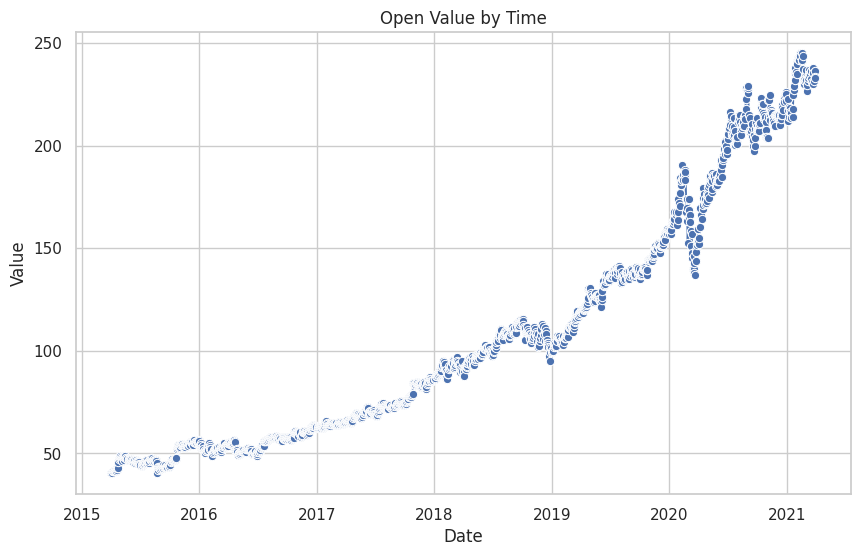

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a time plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=microsoft, marker='o')

# Customize the plot
plt.title('Open Value by Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


# Decomposition Plot

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

df=microsoft

df.head()

,Open,High,Low,Close,Volume,trading_volume
Date,,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322,low
2015-04-02,40.66,40.74,40.12,40.29,37487476,low
2015-04-06,40.34,41.78,40.18,41.55,39223692,low
2015-04-07,41.61,41.91,41.31,41.53,28809375,low
2015-04-08,41.48,41.69,41.04,41.42,24753438,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 to 2021-03-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1511 non-null   float64
 1   High            1511 non-null   float64
 2   Low             1511 non-null   float64
 3   Close           1511 non-null   float64
 4   Volume          1511 non-null   int64  
 5   trading_volume  1511 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.6+ KB


<Axes: xlabel='Date'>

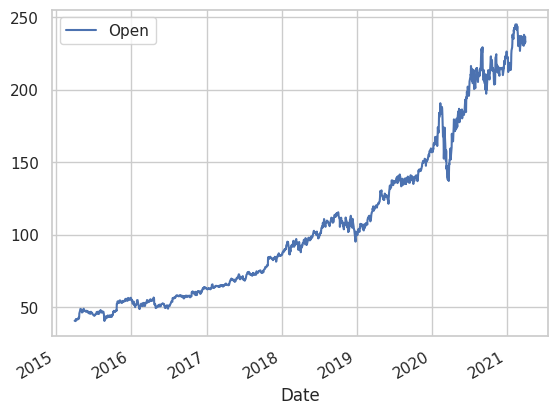

In [ ]:
# df.set_index('Month',inplace=True)
# df.index=pd.to_datetime(df.index)

#drop null values
df.dropna(inplace=True)

df.plot(y='Open')

In [ ]:
result=seasonal_decompose(df['Open'], model='multiplicable',period=12)

<Axes: xlabel='Date'>

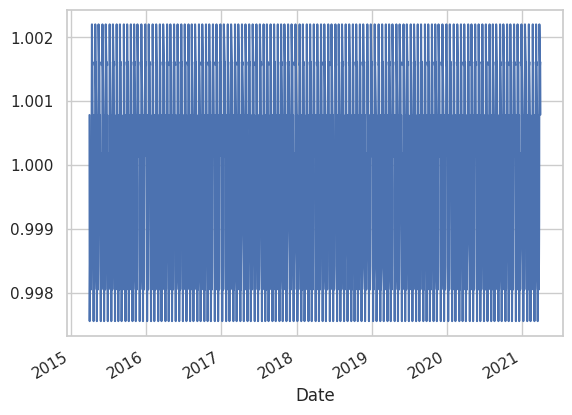

In [ ]:
result.seasonal.plot()

<Axes: xlabel='Date'>

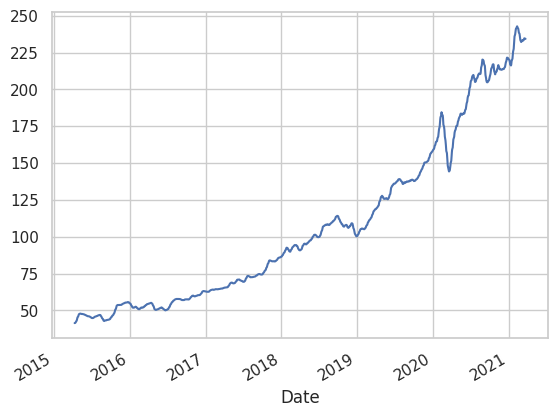

In [ ]:
result.trend.plot()

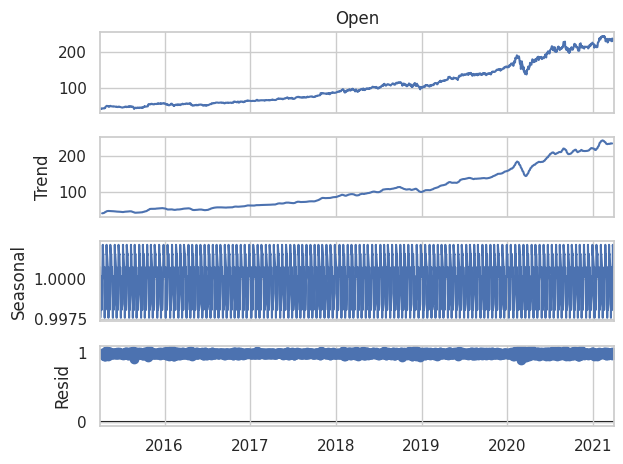

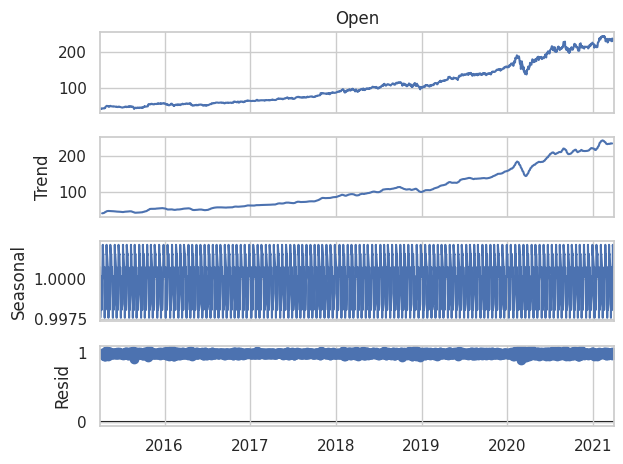

In [ ]:
result.plot()

# Seasonal Subseries Plot

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
dfa=df['Open'].resample(rule='MS').mean()

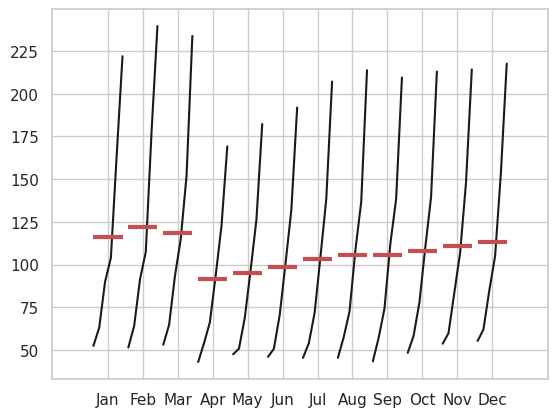

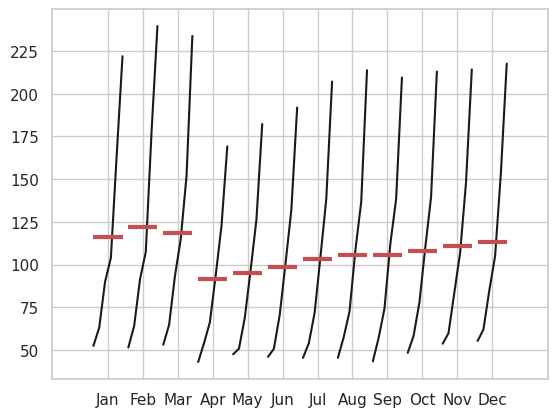

In [ ]:
month_plot(dfa)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_new=df

In [ ]:
# Create a new column for the month
df_new['Month'] = df_new.index.month

# Calculate the average value for each month across all years
monthly_avg = df_new.groupby('Month')['Open'].mean()

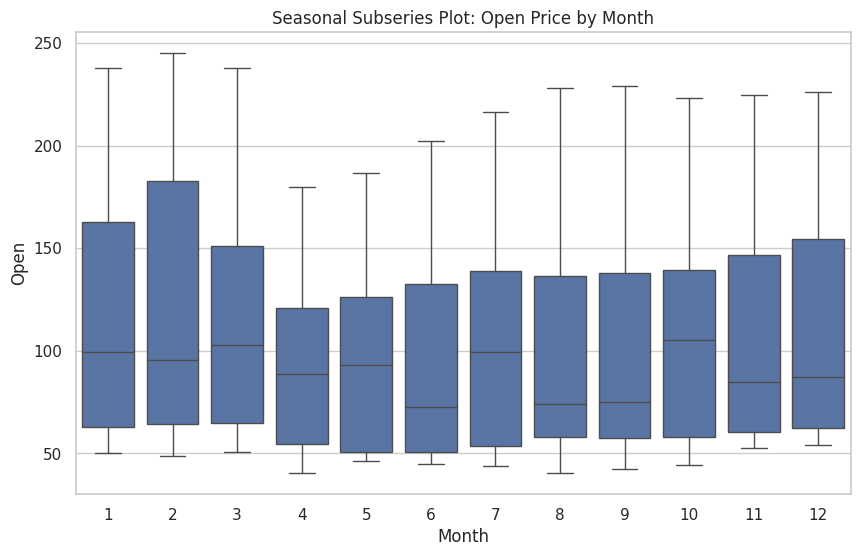

In [ ]:
# Create a seasonal subseries plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['Month'], y=df_new['Open'])
plt.xlabel('Month')
plt.ylabel('Open')
plt.title('Seasonal Subseries Plot: Open Price by Month')
plt.show()

# Autocorrelation Plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

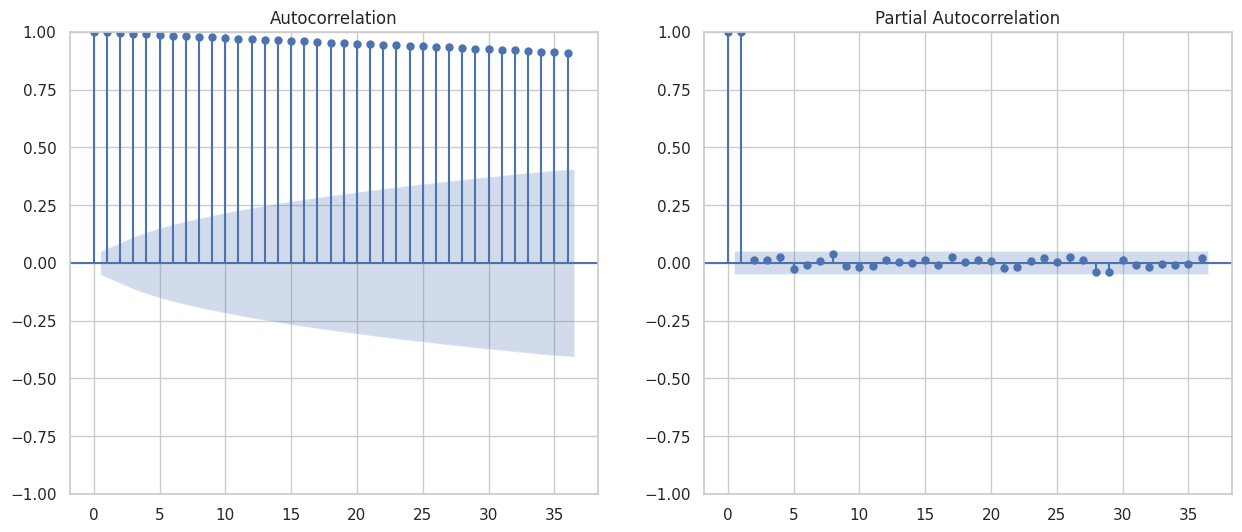

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
#autocorr = acf(data[variable], nlags=12) # just the numbers
plot_acf(df['Open'].tolist(), lags=36, ax=ax[0]); # just the plot
plot_pacf(df['Open'].tolist(), lags=36, ax=ax[1]); # just the plot

# Lagged Scatter Plot

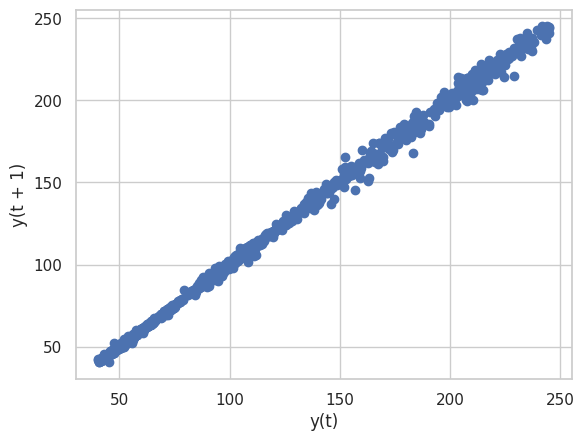

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df['Open']);

# Heatmap

# Spectral Density Plot

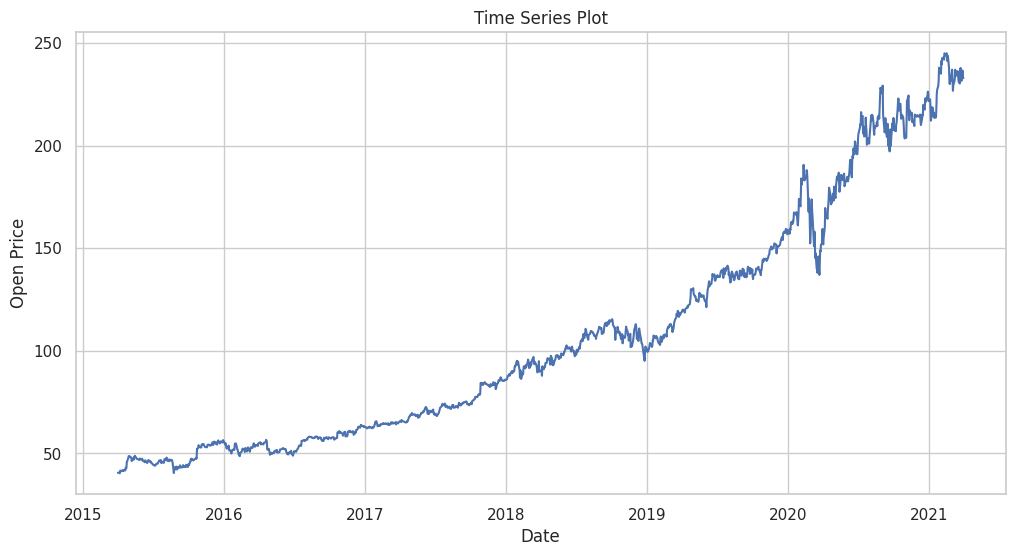

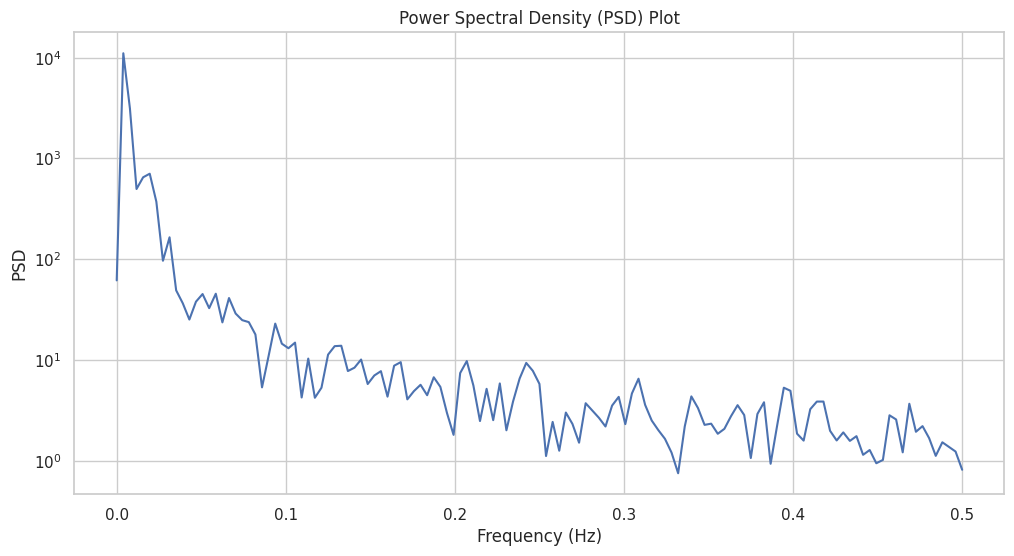

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Convert 'trading_volume' column to numeric
df['trading_volume'] = pd.to_numeric(df['trading_volume'], errors='coerce')

# Create a time series plot for one of the columns (e.g., 'Close')
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Open'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

# Calculate the Power Spectral Density (PSD)
frequencies, psd = welch(df['Open'].dropna(), fs=1.0, nperseg=256)

# Create a PSD plot
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.show()